In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import keras
from keras.models import load_model , Sequential , Model
from keras.layers import Dense , Activation , TimeDistributed, GRU
import matplotlib.pyplot as plt

In [ ]:
# DNN وGRUs وontology
model_ = Sequential()
model_.add(Dense(32, input_shape=(784,)))
#model_.add(TimeDistributed())
#model_.add(GRU())
model_.add(Activation('relu'))
model_.add(Dense(10))
model_.add(Activation('softmax'))
model_.summary()

In [ ]:
# بارگذاری و پیش‌پردازش داده‌های آموزشی
# اینجا از داده‌های CIFAR-10 استفاده می‌کنیم که شامل 60000 عکس رنگی 32x32 پیکسلی از 10 کلاس مختلف است
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# تبدیل عکس‌های رنگی به سیاه و سفید با استفاده از فرمول Y = 0.299 R + 0.587 G + 0.114 B
x_train_gray = np.dot(x_train[...,:3], [0.299, 0.587, 0.114])
x_test_gray = np.dot(x_test[...,:3], [0.299, 0.587, 0.114])

# کاهش مقیاس رنگ‌ها از 0 تا 255 به 0 تا 1
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_gray = x_train_gray / 255.0
x_test_gray = x_test_gray / 255.0

# افزودن بعد کانال به عکس‌های سیاه و سفید
x_train_gray = np.expand_dims(x_train_gray, axis=3)
x_test_gray = np.expand_dims(x_test_gray, axis=3)

In [ ]:
model = load_model('/content/drive/MyDrive/mymodel.h5')

1/1 [==============================] - 0s 38ms/step


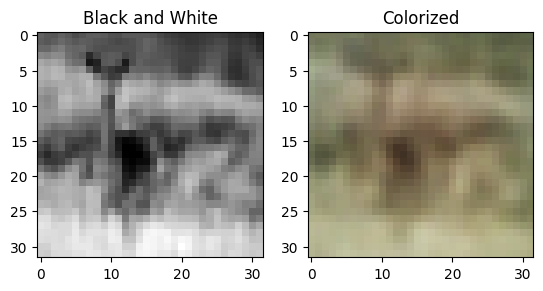

In [ ]:
# پیش‌بینی رنگ برای یک عکس سیاه و سفید تصادفی از داده‌های آزمون
index = np.random.randint(0, 10000)
x = x_test_gray[index]
y = model.predict(x.reshape(1, 32, 32, 1))
y = y.reshape(32, 32, 3)

# نمایش عکس سیاه و سفید و رنگی شده
plt.subplot(1, 2, 1)
plt.imshow(x.squeeze(), cmap='gray')
plt.title('Black and White')
plt.subplot(1, 2, 2)
plt.imshow(y)
plt.title('Colorized')
plt.show()

در قسمت پیچشی این مدل از شش لایه استفاده شده است. سه لایه اول به ترتیب 256و128و64 نورون هستند که برای استخراج ویژگی های محلی عکسها استفاده میشوند(ادغامی هستند که بیشتر برای نمونه کاهی به دلیل افزایش ناوردایی محلی و کاهش اندازه نمونه ورودی).
پس از آن یک لایه فلاتن وجود دارد که تصویر را به بردار تبدیل میکند .
ددو لایه آخر دنس هستند که که به ترتیب 1024و 3072 نورون دارند که برای لنجام عملیات خطی و توامان غیر خطی (امتیازات کلاس یا خروجی را محاسبه می کنند) ، بر روی بردار ورودی استفاده میشوند.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 256)       295168    
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 3)         6915      
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_3 (Dense)             (None, 3072)             